In [1]:
%matplotlib inline

import numpy as np
import random
import matplotlib.pyplot as plt
from environment import Individual, PairEnvironment
from models import create_pairs, deterministic, stochastic, extension
from plot_functions import means_evolution, individual_evolution

## environment.py

### Class Individual
Class `Individual` allows us to define objects which will represent the agents of our environment. Here, total amount of endowment is fixed to one.

#### Attributes
- `asp`: agent's level of aspiration  
- `don`: the next donation it will be giving when playing as a dictator  
- `payoff`: the last donation received  
- `my_donations`: a list of the consecutive donations it is being given  
- `my_aspirations`: a list of the consecutive aspirations it is updating when playing as a recipient
- `envious`: boolean, true if the individual is envious  
- `free_rider`: boolean, true if the individual is a free rider  
- `random_ind`: boolean, true if the individual is the random individual chosen to compare different results obtained from different models  

#### Methods
- `is_envious()`: it returns true if the individual is envious    
- `is_free_rider()`: it returns true if the individual is envious  
- `stimuli(d, a)`: given a donation (`d`) and its aspiration level (`a`), it returns the stimulus experienced by the recipient  
- `update_asp(s, l)`: given a stimulus (`s`) and a learning rate (`l`), it updates recipient's aspiration level  
- `update_payoff(don)`: given a donation (`don`), it updates recipient's payoff value  
- `calculate_don(h)`: for a recipient, given an habituation parameter (`h`), it calculates next deterministic amount it will be donating when playing as a dictator 
- `calculate_stoch_don(h, ep)`: for a recipient, given an habituation parameter (`h`) and a trembling hand value (`ep`), it calculates next stochastic amount it will be donating when playing as a dictator  
- `calculate_envious_don(h, ep)`: for an envious recipient, given an habituation parameter (`h`) and a trembling hand value (`ep`), it calculates next amount the individual will be donating when playing as a dictator  
- `donation()`: returns the donation the individual will be giving when playing as a dictator  
- `features_exchange(ind)`: given another individual (`ind`), attributes are exchanged between both individuals 

### Class PairEnvironment
Class `PairEnvironment` allows us to define objects which will represent the pairs of agents interacting in our environment.

#### Attributes
- `dictator`: Individual object representing the dictator   
- `recipient`: Individual object representing the recipient

#### Methods
- `set_envious(b)`: given a boolean (`b`), the dictator is turned into an envious individual  
- `set_free_rider(b)`: given a boolean (`b`), the dictator is turned into an envious individual  
- `set_random_ind()`: the dictator is turned into the random individual chosen to compare different results obtained from different models  
- `is_envious()`: it returns true if the dictator is envious  
- `is_free_rider()`: it returns true if the dictator is a free rider  
- `make_donation(l, h)`: given a learning rate (`l`) and an habituation parameter (`h`), the dictator gives deterministic donation to the recipient  
- `make_stoch_donation(l, h, ep)`: given a learning rate (`l`), an habituation parameter (`h`) and a trembling hand value (`ep`), the dictator gives stochastic donation to the recipient  
- `make_envious_donation(l, h, ep)`: given a learning rate (`l`), an habituation parameter (`h`) and a trembling hand value (`ep`), the envious dictator gives donation to the recipient  
- `make_freerider_donation(l, h, ep)`: given a learning rate (`l`), an habituation parameter (`h`) and a trembling hand value (`ep`), a free rider gives donation (0.0) to the recipient  
- `swap_roles()`: it swaps the roles between current dictator and recipient  
- `get_state(b)`: it returns the dictator's donation and aspiration, and the recipient's donation and aspiration. If `b` is equal to true, these values are printed (for debugging)  
- `ind_exchange(e)`: given another pair `e`, it randomly chooses between dictator or recipient and exchanges it with `e`'s dictator or recipient, respectively  

## models.py

### Methods

- `create_pairs(N, randomp)`: given the number of pairs `N` and the index indicating the random individual chosen to compare different results obtained from different models, it returns a list of pairs of individuals  
- `deterministic(learn, habit, M, N, pairs)`: given the learning rate (`learn`), the habituation parameter (`habit`), the number of iterations (`M`), the number of pairs (`N`) and the list of pairs (`pairs`), it returns:
     - the list of pairs (after the consecutive **deterministic** donations and its corresponding transformation of the individuals' state)
     - a list with the means of all individual's donations obtained in every **deterministic** iteration
     - a list with the means of all individual's aspirations obtained in every **deterministic** iteration
- `stochastic(learn, habit, M, N, pairs, epsilon)`: given the learning rate (`learn`), the habituation parameter (`habit`), the number of iterations (`M`), the number of pairs (`N`), the list of pairs (`pairs`) and the trembling hand (`epsilon`), it returns:
     - the list of pairs (after the consecutive **stochastic** donations and its corresponding transformation of the individuals' state)
     - a list with the means of all individual's donations obtained in every **stochastic** iteration
     - a list with the means of all individual's aspirations obtained in every **stochastic** iteration
- `extension(learn, habit, M, N, pairs, epsilon, envious_prob, fr)`: given the learning rate (`learn`), the habituation parameter (`habit`), the number of iterations (`M`), the number of pairs (`N`), the list of pairs (`pairs`), the trembling hand (`epsilon`), the probability of being envious (`envious_prob`) and the number of free-riders (`fr`), it returns:
     - the list of pairs (after the consecutive **envious/free-rider** donations and its corresponding transformation of the individuals' state)
     - a list with the means of all individual's donations obtained in every **envious/free-rider** iteration
     - a list with the means of all individual's aspirations obtained in every **envious/free-rider** iteration  


## plot_functions.py

### Methods

- `means_evolution(nfig, l, h, learn, habit, sp, M, donations, aspirations, model, epsilon=0.0, envious_prob=0.0, fr=0)`: given the number of the figure (`nfig`), the list of different learning rates (`l`), the list of different habituation parameters (`h`), the current learning rate (`learn`), the current habituation parameter (`habit`), the initial number of the subplot (`sp`), the number of iterations (`M`), the list with the means of donations (`donations`), the list with the means of aspirations (`aspirations`), the model (`model` $\in\{$'deterministic', 'stochastic', 'extension'$\}$), the trembling hand (`epsilon`, equal to zero by default), the probability of being envious (`envious_prob`, equal to zero by default) and the number of free-riders (`fr`, equal to zero by default), it plots a graphic with the evolution of the means of the donations and the aspirations over the iterations.  

- `individual_evolution(pairs, nfig, l, h, learn, habit, spi, M, model, epsilon=0.0, envious_prob=0.0, fr=0)`: given the pairs of individuals (`pairs`), the number of the figure (`nfig`), the list of different learning rates (`l`), the list of different habituation parameters (`h`), the current learning rate (`learn`), the current habituation parameter (`habit`), the initial number of the subplot (`spi`), the number of iterations (`M`), the model (`model` $\in\{$'deterministic', 'stochastic', 'extension'$\}$), the trembling hand (`epsilon`, equal to zero by default), the probability of being envious (`envious_prob`, equal to zero by default) and the number of free-riders (`fr`, equal to zero by default), it plots a graphic with the evolution of the donations and the aspirations over the iterations for the random individual chosen to compare different results obtained from different models.


The level of **aspiration** changes in the same way for all the models. The aspiration changes depending on the stimulus: it increases when the stimulus is positive and decreases when it is negative. The strength of this effect is moderated by the **learning rate**: the higher the learning rate is, the stronger this increases and decreases are.

The difference between the models is the way the **donations** change. For all the models, the donation depends on the past donation and the donation received (the payoff $\pi$) by the dictator (when playing as a recipient). The balance between these two values is modulated by the **habituation parameter**: the higher the habituation parameter is, the more influential the payoff is, and consequently the less influential the past donation is.

## Deterministic model

For this model, results are practically the same observed in the paper. In the next figures, each subplot presents results for a combination of learning rate (in increasing order from top to bottom) and habituation parameter (in increasing order from left to right).

By looking at the evolution of donations and aspirations for a random individual (second figure) we can observe the influence of learning rate and habituation parameter. For higher values of `h`, the donations turn into more unstable, with more peaks, and for higher values of `l`the decreases are more pronounced.

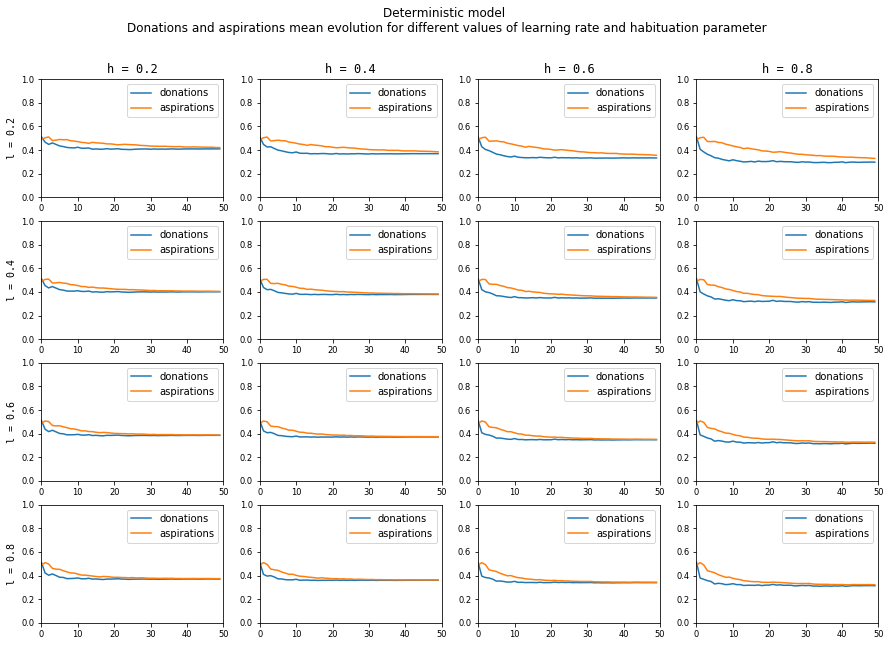

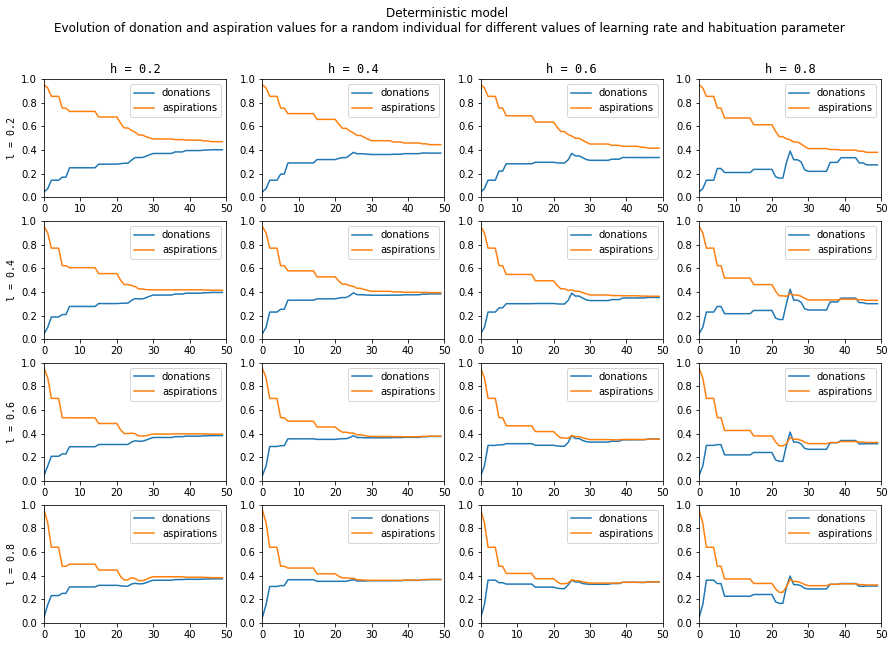

In [2]:
random.seed(0)
np.random.seed(0)
l = [0.2, 0.4, 0.6, 0.8]
h = [0.2, 0.4, 0.6, 0.8]
N = 500  # number of pairs 
M = 50   # number of iterations
randomp = random.randint(0, N)

sp = 1   # subplot index for means_evolution
spi = 1  # subplot index for individual_evolution

for learn in l:
	for habit in h:
		random.seed(0)
		np.random.seed(0)
        
        # Create an environment with N pairs of individuals
		pairs = create_pairs(N, randomp)
        
        # Deterministic model
		pairs, deterministic_donations, deterministic_aspirations = deterministic(learn, habit, M, N, pairs)
        
        # Plot donation and aspiration mean evolution
		means_evolution(0, l, h, learn, habit, sp, M, deterministic_donations, deterministic_aspirations, 'deterministic')
		sp += 1

		# Donation and aspiration evolution for a random individual
		individual_evolution(pairs, 1, l, h, learn, habit, spi, M, 'deterministic')
		spi += 1
plt.show()

## Stochastic model

In order to introduce variaty and to reproduce better the empirical results mentioned in the paper, we introduce an *imperfect donation making* or *trembling hand* (`epsilon`).

### Low 'trembling hand' parameter

For low value of `epsilon`we can observe that results are not very different from deterministic results.

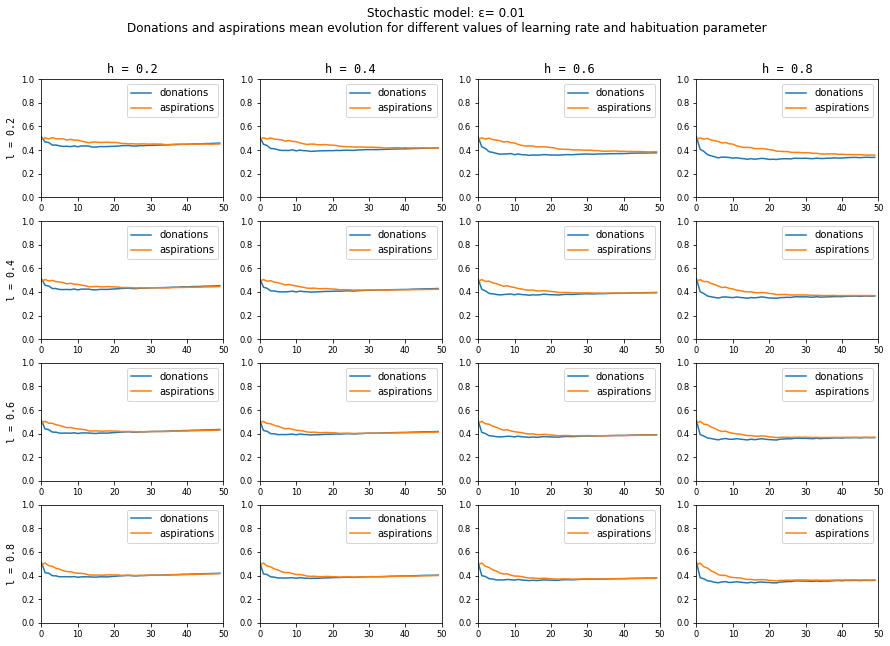

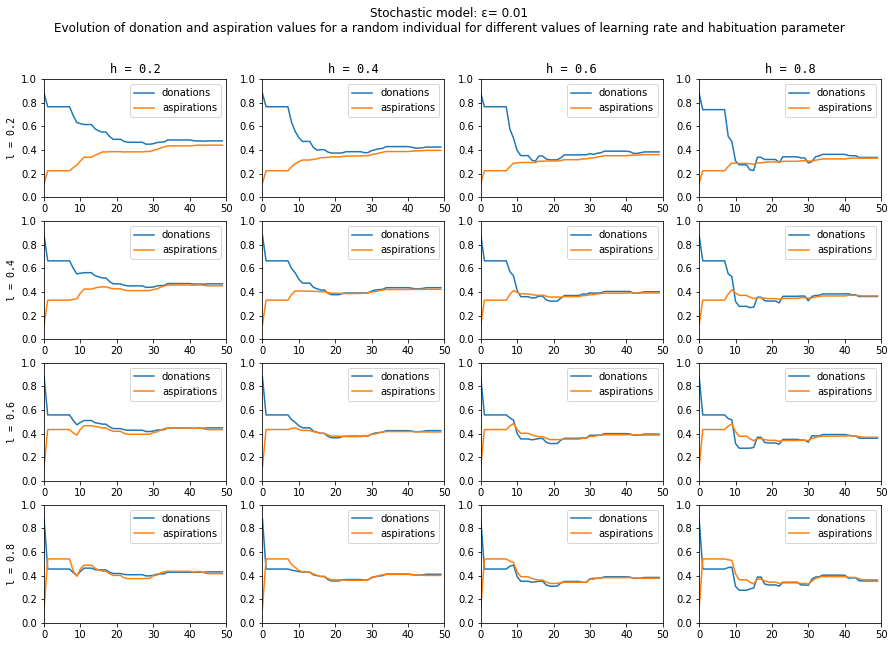

In [3]:
random.seed(0)
np.random.seed(0)
epsilon = 0.01  # 'trembling hand' parameter
l = [0.2, 0.4, 0.6, 0.8]
h = [0.2, 0.4, 0.6, 0.8]
N = 500  # number of pairs
M = 50   # number of iterations
randomp =  random.randint(0, N)

sp = 1   # subplot index for means_evolution
spi = 1  # subplot index for individual_evolution

for learn in l:
	for habit in h:
		random.seed(0)
		np.random.seed(0)
        
        # Create an environment with N pairs of individuals
		pairs = create_pairs(N, randomp)
        
        # Deterministic model
		pairs, stochastic_donations, stochastic_aspirations = stochastic(learn, habit, M, N, pairs, epsilon)
        
        # Plot donation and aspiration mean evolution
		means_evolution(2, l, h, learn, habit, sp, M, stochastic_donations, stochastic_aspirations, 'stochastic', epsilon)
		sp += 1

		# Donation and aspiration evolution for a random individual
		individual_evolution(pairs, 3, l, h, learn, habit, spi, M, 'stochastic', epsilon)
		spi += 1 
plt.show()

### Higher 'trembling hand' parameter

If now we increase `epsilon`, we can observe some interesting differences. Donations tend to be between 40% and 50%, and for most of the cases donations exceed aspirations. This maybe could be interpeted a result of an emergence behavior such as *overestimation*. Now, for the random individual, the donation is unstable independent of the value of the habituation parameter.

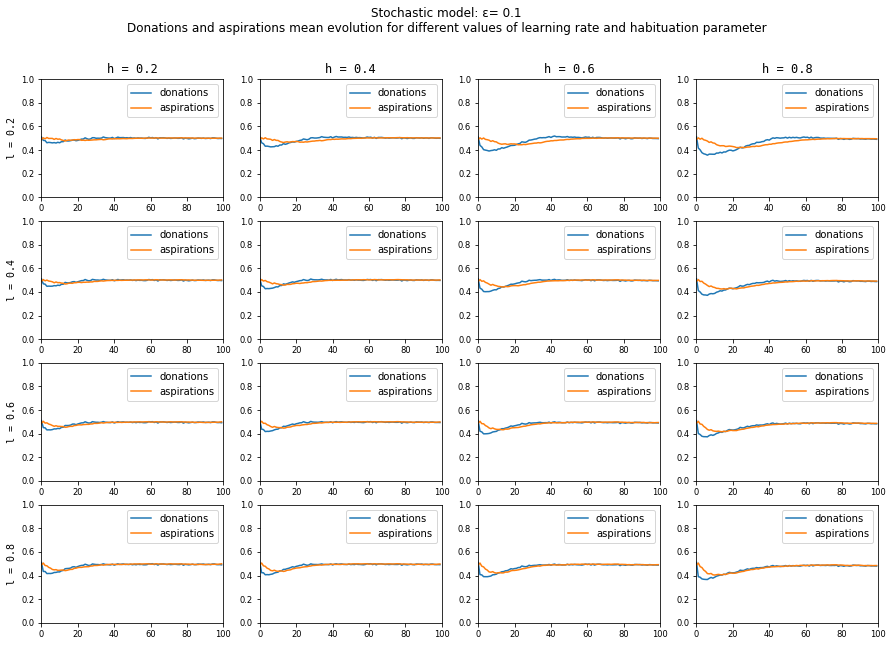

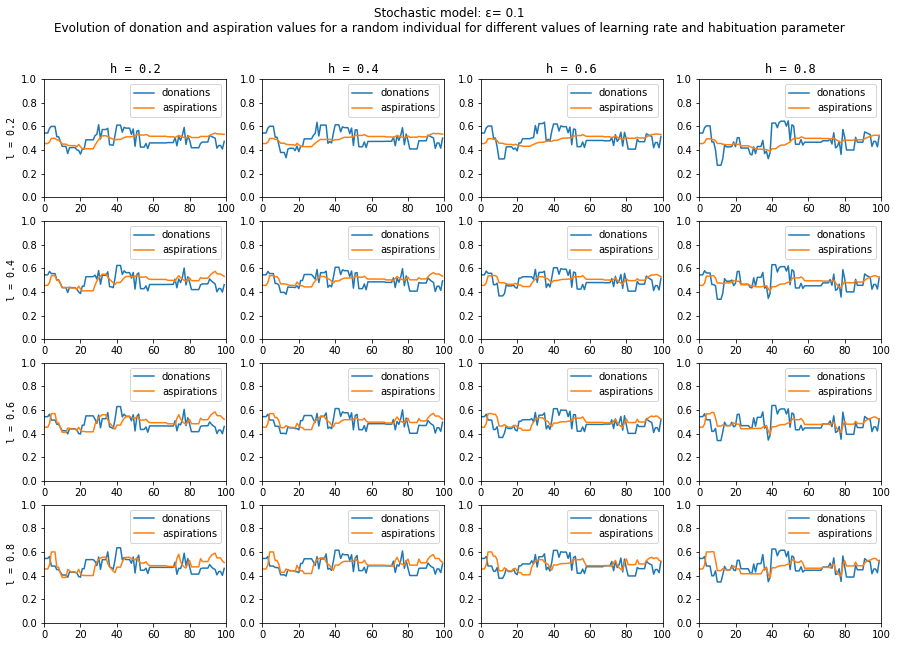

In [8]:
random.seed(0)
np.random.seed(0)
epsilon = 0.1  # 'trembling hand' parameter
l = [0.2, 0.4, 0.6, 0.8]
h = [0.2, 0.4, 0.6, 0.8]
N = 500  # number of pairs
M = 100   # number of iterations
randomp =  random.randint(0, N)

sp = 1
spi = 1

for learn in l:
	for habit in h:
		random.seed(0)
		np.random.seed(0)
        
        # Create an environment with N pairs of individuals
		pairs = create_pairs(N, randomp)
        
        # Stochastic model
		pairs, stochastic_donations_plus, stochastic_aspirations_plus = stochastic(learn, habit, M, N, pairs, epsilon)
        
        # Plot donation and aspiration mean evolution
		means_evolution(2, l, h, learn, habit, sp, M, stochastic_donations_plus, stochastic_aspirations_plus, 'stochastic', epsilon)
		sp += 1

		# Donation and aspiration evolution for a random individual
		individual_evolution(pairs, 3, l, h, learn, habit, spi, M, 'stochastic', epsilon)
		spi += 1 
plt.show()

## Model extensions: envious agents and free-riders

### 0 free-riders and probability of being envious equal to 0.05

Finally, if we introduce the envious behavior by assigning a probability of being envious equal to 0.05, we obtain very similar results to the deterministic ones. This makes sense, given that, as we observed, donations tended to be between 30% and 40% in the deterministic model, so the restriction of not donating more than 50% (that characterizes the envious agents) is not affecting the individuals.

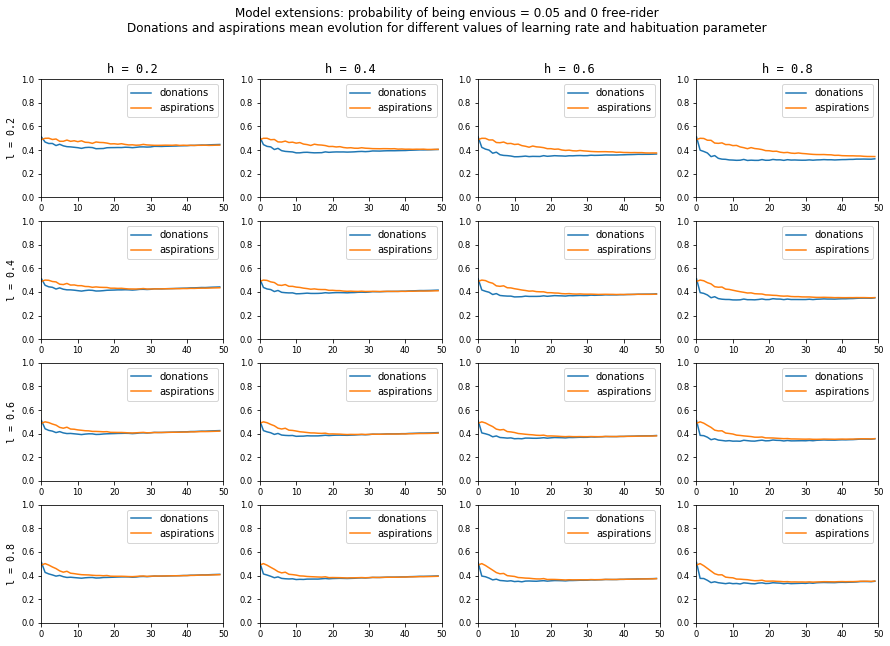

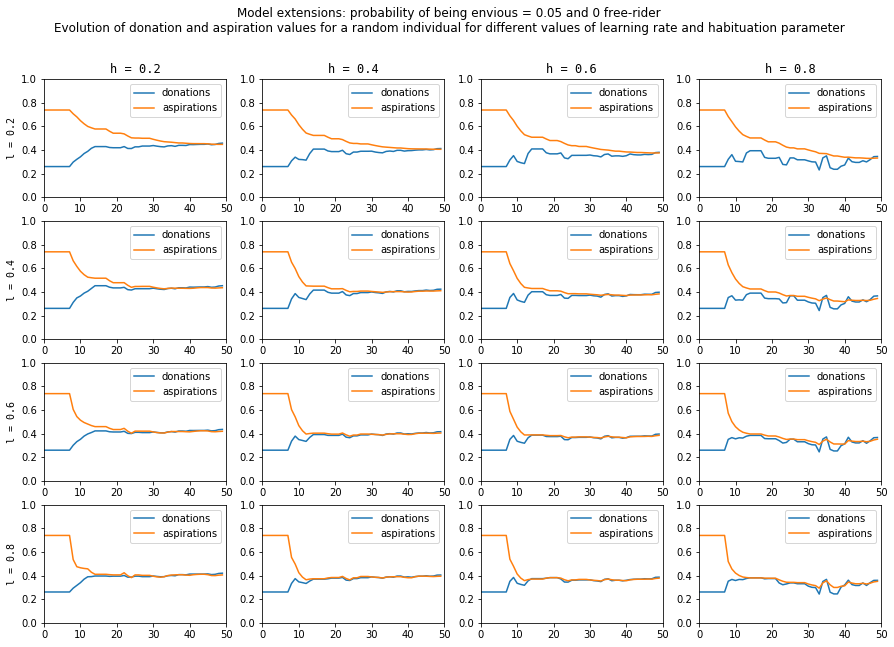

In [16]:
random.seed(0)
np.random.seed(0)
epsilon = 0.01  # 'trembling hand' parameter
l = [0.2, 0.4, 0.6, 0.8]
h = [0.2, 0.4, 0.6, 0.8]
N = 500  # number of pairs
M = 50   # number of iterations
randomp =  random.randint(0, N)
envious_prob = 0.05  # probability of being envious
fr = 0  # number of free-riders

sp = 1
spi = 1

for learn in l:
	for habit in h:
		random.seed(0)
		np.random.seed(0)
        
        # Create an environment with N pairs of individuals
		pairs = create_pairs(N, randomp)
        
        # Model extensions
		pairs, extension_donations, extension_aspirations = extension(learn, habit, M, N, pairs, epsilon, envious_prob, fr)
        
        # Plot donation and aspiration mean evolution
		means_evolution(4, l, h, learn, habit, sp, M, extension_donations, extension_aspirations, 'extension', epsilon, envious_prob, fr)
		sp += 1

		# Donation and aspiration evolution for a random individual
		individual_evolution(pairs, 5, l, h, learn, habit, spi, M, 'extension', epsilon, envious_prob, fr)
		spi += 1 
plt.show()

### 1 free-rider and probability of being envious equal to 0.05

If we introduce one free-rider, we will not be able to observe significant changes (probably because we are introducing just one free-rider in a society with 1000 individuals).

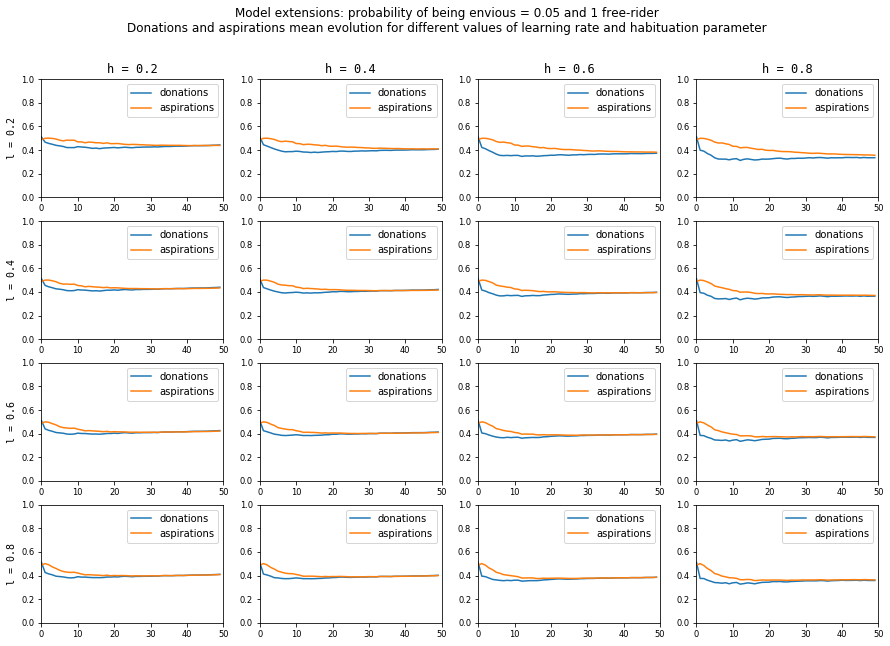

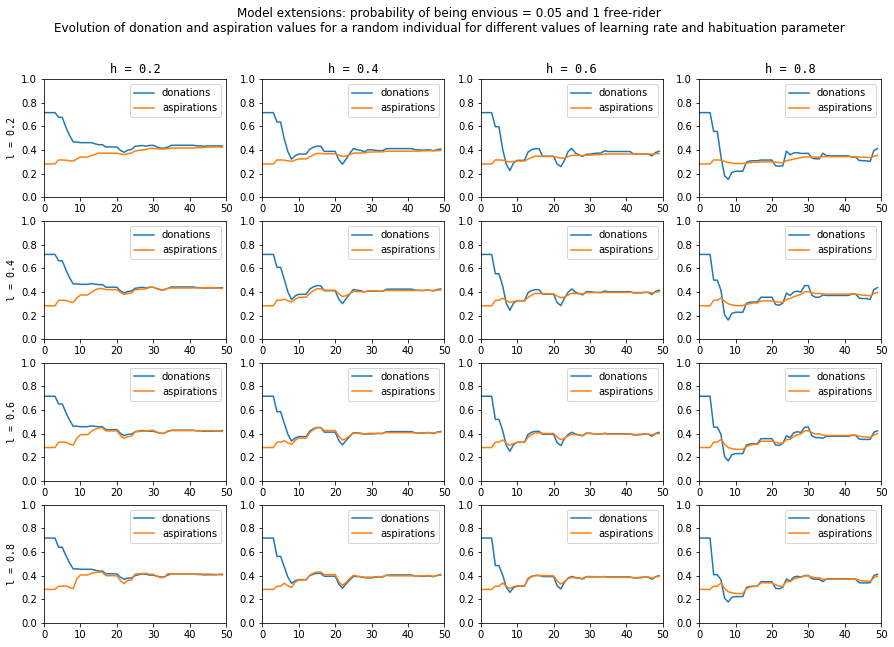

In [6]:
random.seed(0)
np.random.seed(0)
epsilon = 0.01  # 'trembling hand' parameter
l = [0.2, 0.4, 0.6, 0.8]
h = [0.2, 0.4, 0.6, 0.8]
N = 500  # number of pairs
M = 50   # number of iterations
randomp =  random.randint(0, N)
envious_prob = 0.05  # probability of being envious
fr = 1  # number of free-riders

sp = 1
spi = 1

for learn in l:
	for habit in h:
		random.seed(0)
		np.random.seed(0)
        
        # Create an environment with N pairs of individuals
		pairs = create_pairs(N, randomp)
        
        # Model extensions
		pairs, extension_donations, extension_aspirations = extension(learn, habit, M, N, pairs, epsilon, envious_prob, fr)
        
        # Plot donation and aspiration mean evolution
		means_evolution(6, l, h, learn, habit, sp, M, extension_donations, extension_aspirations, 'extension', epsilon, envious_prob, fr)
		sp += 1

		# Donation and aspiration evolution for a random individual
		individual_evolution(pairs, 7, l, h, learn, habit, spi, M, 'extension', epsilon, envious_prob, fr)
		spi += 1 
plt.show()

### More free-riders and different probabilities of being envious

Now, if we introduce 15 free-riders (1.5% of the society), we start to observe drastic changes: donations start tending to be between 20% and 30%, and it declines in an exponential way if we keep increasing the number of free-riders.

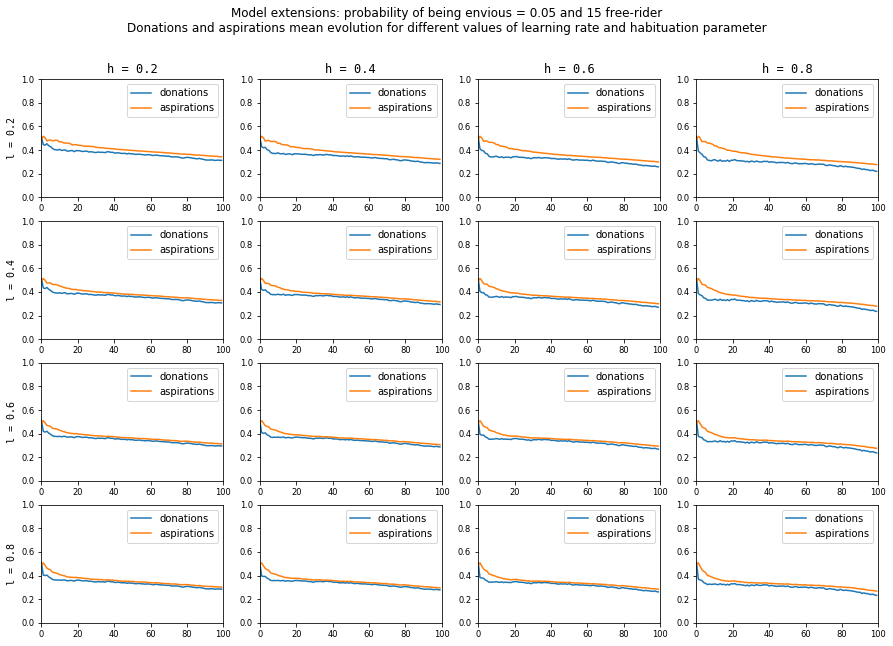

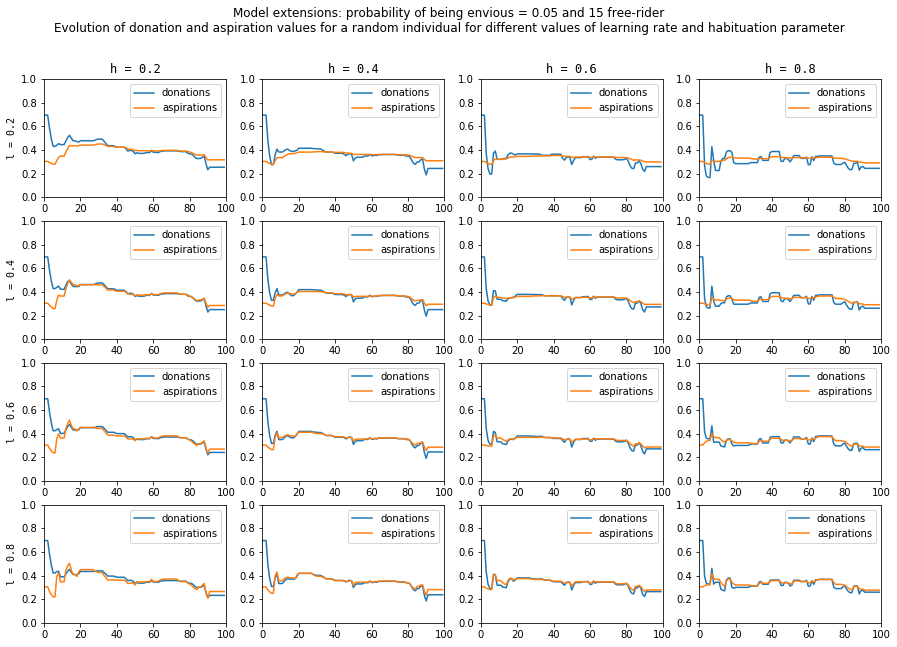

In [20]:
random.seed(0)
np.random.seed(0)
epsilon = 0.01  # 'trembling hand' parameter
l = [0.2, 0.4, 0.6, 0.8]
h = [0.2, 0.4, 0.6, 0.8]
N = 500  # number of pairs
M = 100   # number of iterations
randomp =  random.randint(0, N)
envious_prob = 0.05  # probability of being envious
fr = 15  # number of free-riders

sp = 1
spi = 1

for learn in l:
	for habit in h:
		random.seed(0)
		np.random.seed(0)
        
        # Create an environment with N pairs of individuals
		pairs = create_pairs(N, randomp)
        
        # Model extensions
		pairs, extension_donations, extension_aspirations = extension(learn, habit, M, N, pairs, epsilon, envious_prob, fr)
        
        # Plot donation and aspiration mean evolution
		means_evolution(8, l, h, learn, habit, sp, M, extension_donations, extension_aspirations, 'extension', epsilon, envious_prob, fr)
		sp += 1

		# Donation and aspiration evolution for a random individual
		individual_evolution(pairs, 9, l, h, learn, habit, spi, M, 'extension', epsilon, envious_prob, fr)
		spi += 1 
plt.show()